In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import transbigdata as tbd


In [2]:
a = np.array(np.meshgrid(np.linspace(121.204286,121.209286,100),np.linspace(31.293445,31.298445,100)))
trajdata = a.reshape(2,-1).T
trajdata = pd.DataFrame(trajdata,columns = ['longitude','latitude'])

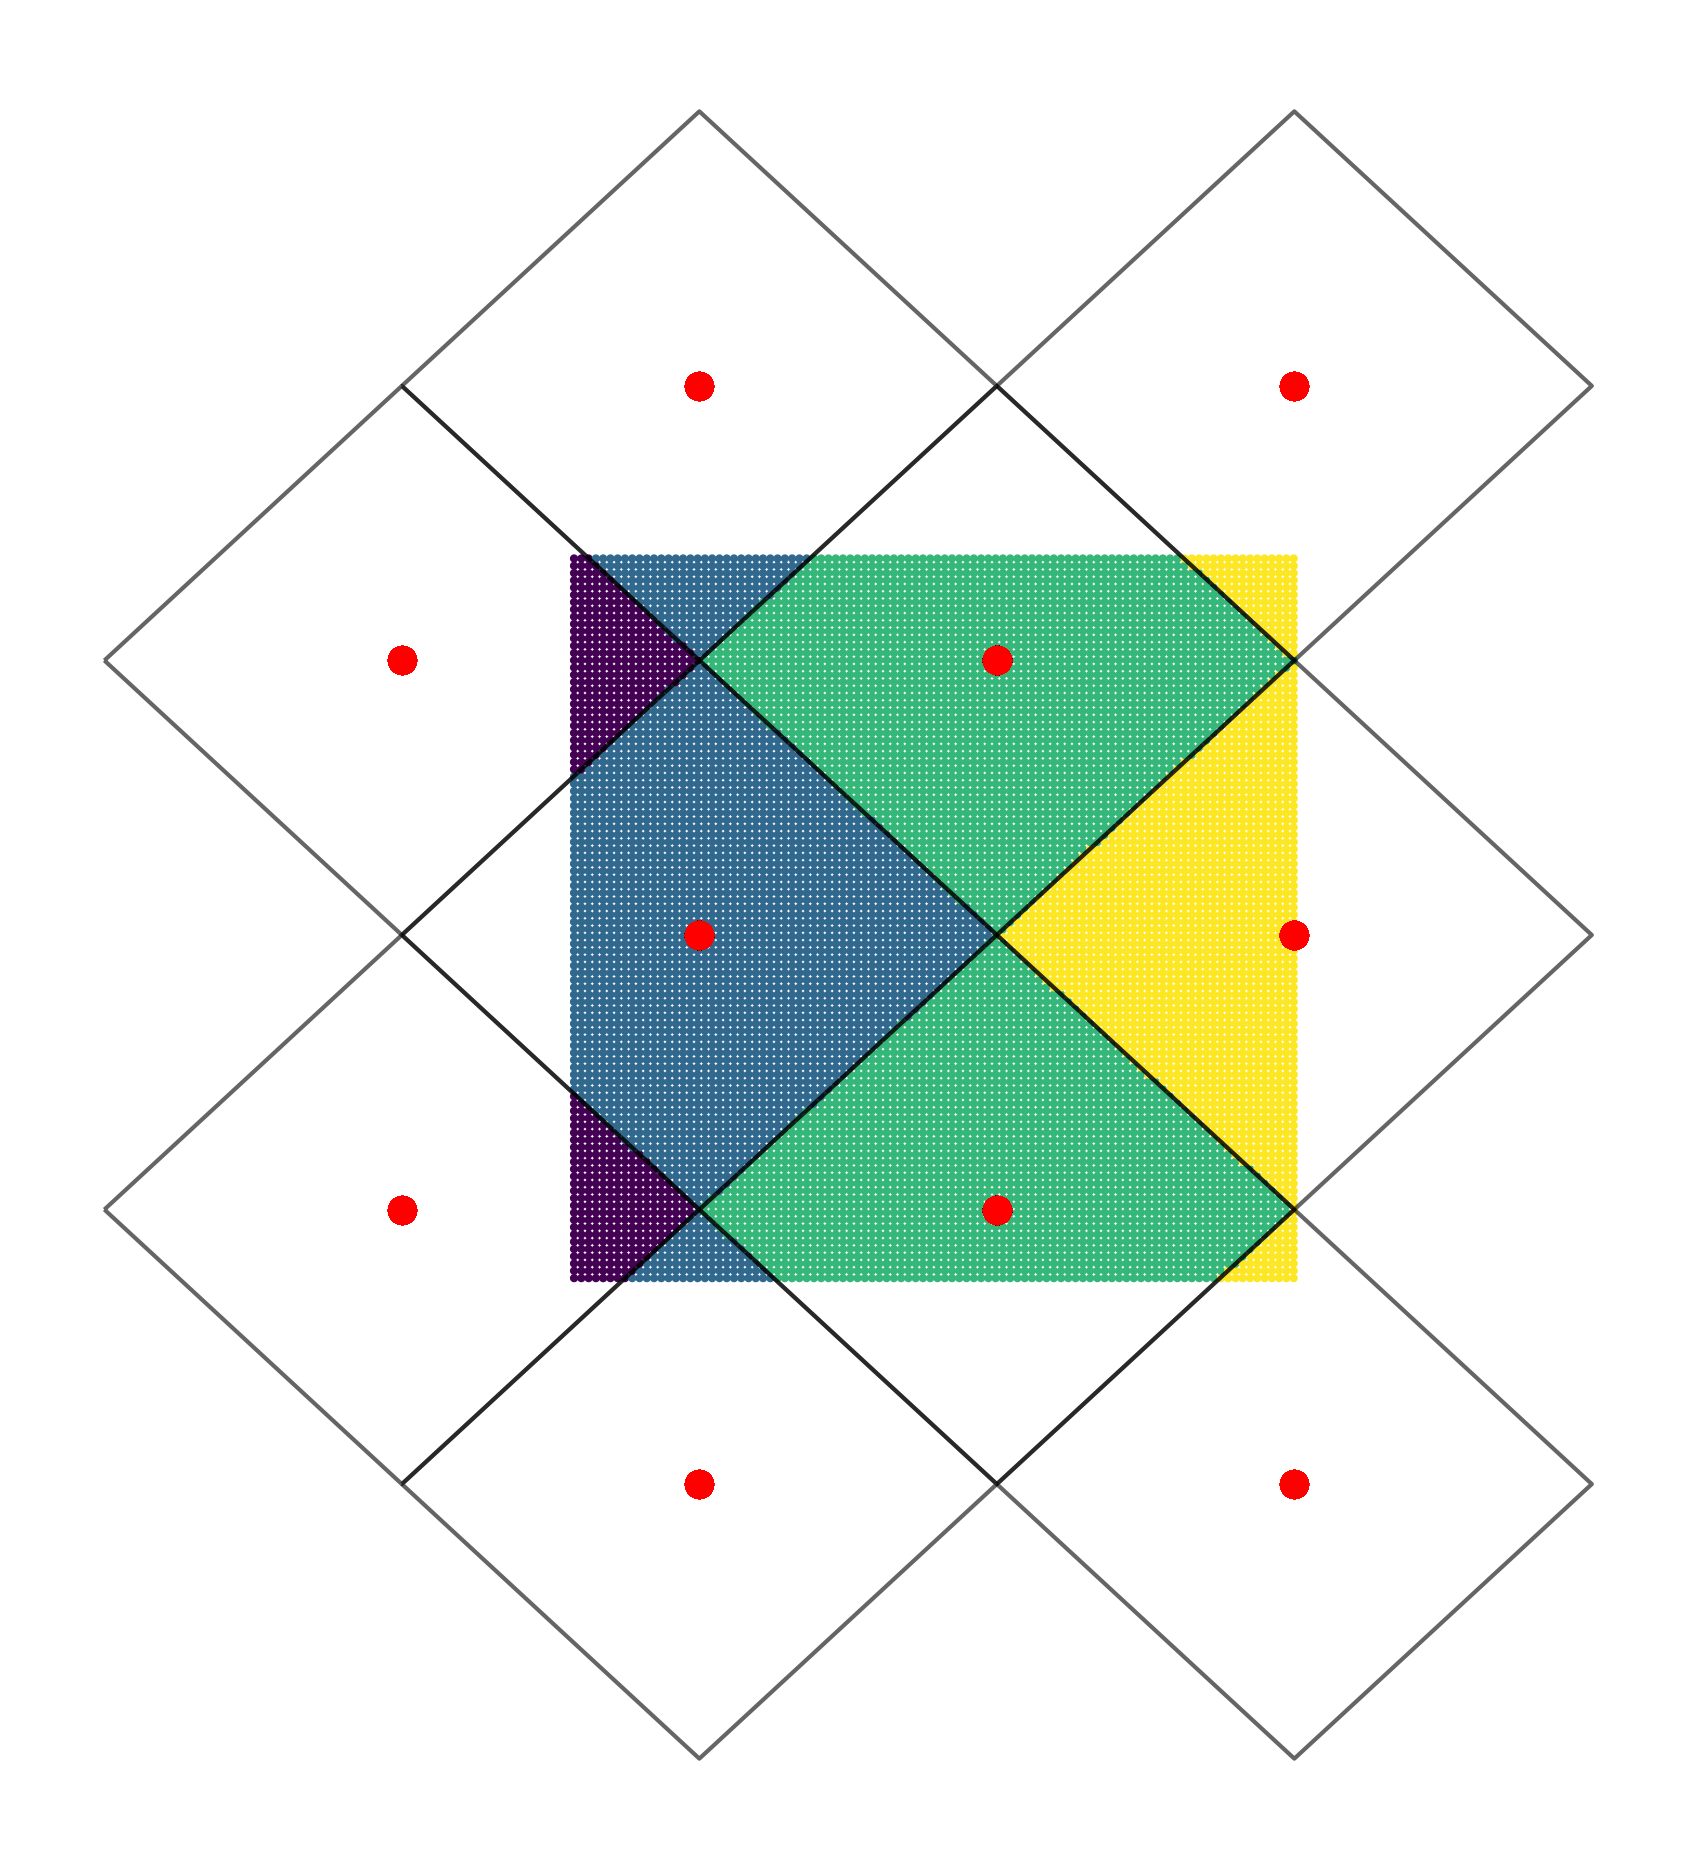

In [3]:
import transbigdata as tbd
bounds = [113.6,22.4,114.8,22.9]
params = tbd.grid_params(bounds,accuracy = 300)
params = [*params,45]
import geopandas as gpd


trajdata['LONCOL'],trajdata['LATCOL'] = tbd.GPS_to_grids(trajdata['longitude'],trajdata['latitude'],params=params)
trajdata['HBLON'],trajdata['HBLAT'] = tbd.grids_centre(trajdata['LONCOL'],trajdata['LATCOL'],params)
trajdata['geometry'] = tbd.gridid_to_polygon(trajdata['LONCOL'],trajdata['LATCOL'],params=params)
grids_max = trajdata.drop_duplicates(subset = ['LONCOL','LATCOL'])
grids_max = gpd.GeoDataFrame(grids_max)

#轨迹点
trajdata['geometry'] = gpd.points_from_xy(trajdata['longitude'],trajdata['latitude'])
trajdata = gpd.GeoDataFrame(trajdata)

#创建图框
import matplotlib.pyplot as plt
fig =plt.figure(1,(8,8),dpi=300)
ax =plt.subplot(111)
plt.sca(ax)
plt.axis('off')
trajdata.plot(ax = ax,column=trajdata['LATCOL']+trajdata['LONCOL'],markersize = 1)
plt.scatter(trajdata['HBLON'],trajdata['HBLAT'],c = 'r')
grids_max.plot(lw = 1,edgecolor = (0,0,0,0.6),facecolor = (0,0,0,0),ax = ax)
plt.show()

In [4]:
np.allclose(params,tbd.regenerate_params(grids_max))

[113.59999999999943,
 22.40000000001147,
 0.0029234344541381415,
 0.002697963123852245,
 45.0]